# COVID-19 Detection Using Deep Learning Techniques

The objective of this project is to employ two techniques of Convolutional Neural Networks (CNN) to create machine learning models that can accurately predict COVID-19 infection. Specifically, the project aims to integrate machine learning to reduce human involvement in the analysis of X-ray images for detecting COVID-19 infection, thereby enhancing efficiency within the healthcare sector. The project will be guided by below guideline, and upon the completion of the ML model development, we will utilize the Flask framework for web-based deployment.

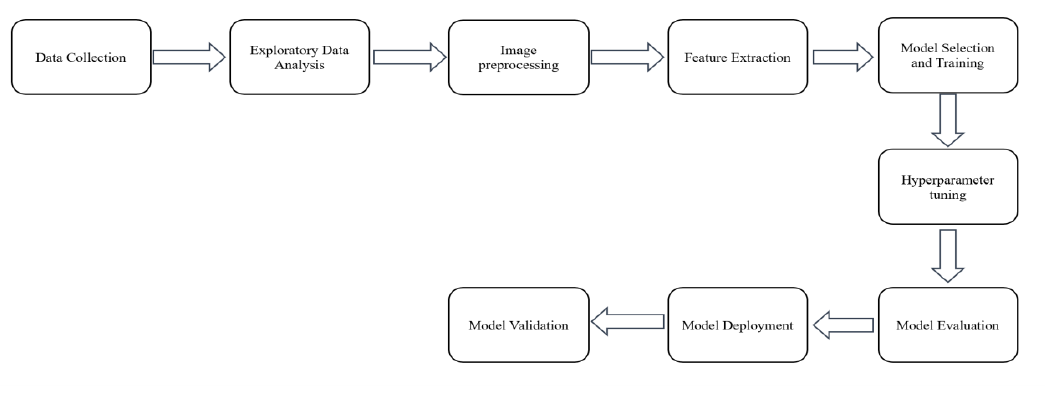

Figure 1. The process workflow diagram 

Reference:  project proposal

## Load the images

The images are organized within a directory structure that comprises three subdirectories, each corresponding to the three classes of image samples. To gather and store these image samples from the multiple subdirectories, we'll initialize an empty list and append the image files to this empty list created [1]. 

In [1]:
# Import the relevant libraries
import os
import cv2

# Define the root directory containing subdirectories with images
data_directory = r"C:\Users\user\Downloads\Lung Segmentation Data\Train"

# Create an empty list to store image samples from subdirectories
image_samples = []

# Iterate over the subdirectories
for subdirectory in os.listdir(data_directory):
    # Construct the path to the subdirectory
    subdirectory_path = os.path.join(data_directory, subdirectory)
    
    # Iterate through the files in the subdirectory and add images to the list
    for filename in os.listdir(subdirectory_path):
        image_path = os.path.join(subdirectory_path, filename)
        image = cv2.imread(image_path)
        if image is not None:
            image_samples.append(image)

## Exploratory Data Analysis

We aim to delve into the dataset to understand the data in terms of what tchniques will be required during the image preprocessing stage to condition the train and validation datasets for modelling. This exploration entails gaining insights into aspects such as class distribution, quantity, image size, resolution, and other relevant statistical information.

- ### Class Distribution and structure of the dataset

This code displays sample images, providing a visual representation of the dataset's image content for better understanding.

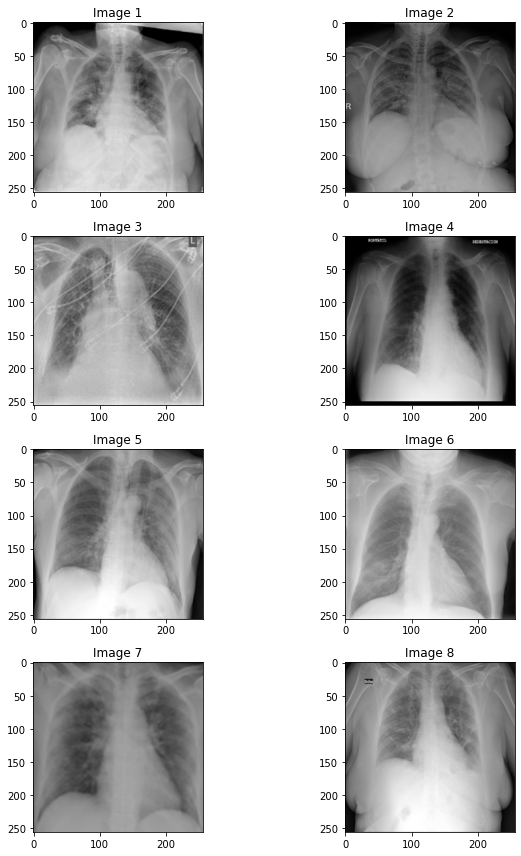

In [2]:
# Import the relevant library
import matplotlib.pyplot as plt

# Define the number of rows and columns for subplots
num_rows, num_cols = 4, 2

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))

# Viewing 8 sample images
for i in range(8):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Display the image
    ax.imshow(cv2.cvtColor(image_samples[i], cv2.COLOR_BGR2RGB))
    ax.set_title(f"Image {i + 1}")

# Hide any empty subplots
for i in range(8, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.axis('off')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


**Key Observations**

- Image samples have a square shape of size 256 x 256

- Samples are mix of males and females

- The lung color varies among samples, with some displaying a deep black shade, while others exhibit a lighter black hue.

Number of subdirectories: 3
Names of subdirectories:
COVID-19
Non-COVID
Normal
Subdirectory: COVID-19, File Count: 7658
Subdirectory: Non-COVID, File Count: 7208
Subdirectory: Normal, File Count: 6849


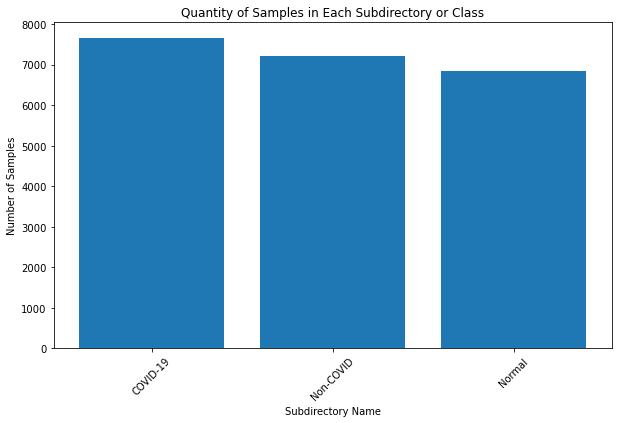

In [3]:
#Understanding the structure of the dataset directory

# Path to the main directory containing subdirectories
data_dir = r"C:\Users\user\Downloads\Lung Segmentation Data\Train"

# Get the names of subdirectories in the data_dir
subdirectories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Print the number of subdirectories
num_subdirectories = len(subdirectories)
print(f"Number of subdirectories: {num_subdirectories}")

# Print the names of subdirectories
print("Names of subdirectories:")
for subdirectory in subdirectories:
    print(subdirectory)

# Create a list to store subdirectory counts
subdirectory_counts = []

# Calculate the quantity of each subdirectory and store in the list
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(data_dir, subdirectory)
    subdirectory_count = len(os.listdir(subdirectory_path))
    subdirectory_counts.append(subdirectory_count)
    print(f"Subdirectory: {subdirectory}, File Count: {subdirectory_count}")

# Plot the quantity of each subdirectory
plt.figure(figsize=(10, 6))
plt.bar(subdirectories, subdirectory_counts)
plt.xlabel("Subdirectory Name")
plt.ylabel("Number of Samples")
plt.title("Quantity of Samples in Each Subdirectory or Class")
plt.xticks(rotation=45)
plt.show()


**Key Observations**

- Within the main directory, there are three subdirectories or classes: COVID-19, Non-COVID, and Normal.

- The COVID-19 subdirectory contains the largest number of samples, while the Normal subdirectory has the fewest samples.

- ### Analyzing Image Properties

To enhance our understanding of the image data, we can extract details such as size, resolution, and color distribution from the images within the subdirectories. This analysis yields valuable insights into the image characteristics, aiding in the discovery of patterns or anomalies within the dataset [1].

- This code creates a list of sizes, resolutions, and color distribution to further the analysis of the image properties.

In [5]:
# Analyzing Image Properties
import numpy as np
import pandas as pd
# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Function to extract properties from an image
def extract_image_properties(img_path):
    # Load the image file using OpenCV
    img = cv2.imread(img_path)

    # Extract the size of the image
    size = os.path.getsize(img_path)

    # Extract the resolution of the image
    resolution = img.shape[:2]

    # Extract the color distribution of the image
    color_distribution = np.bincount(img.flatten(), minlength=256)

    return size, resolution, color_distribution

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.lower().endswith(('.png')):
            # Construct the image path
            img_path = os.path.join(dirpath, filename)

            # Extract image properties using the function
            size, resolution, color_distribution = extract_image_properties(img_path)

            # Append the results to the respective lists
            sizes.append(size)
            resolutions.append(resolution)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)


- This code uses the image sizes list created in the previous code to visualize the size distribution and also displays additional statistical information

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


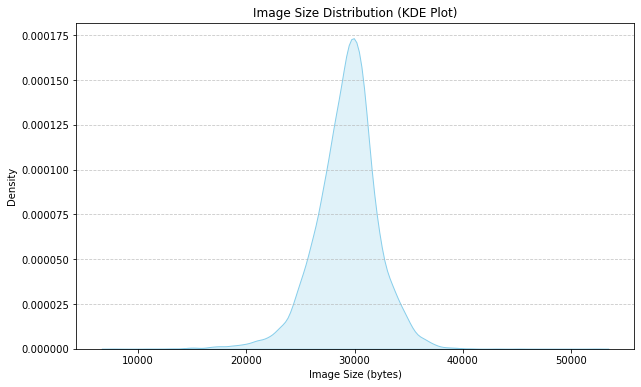

The statiscal information about the image size  count    21715.000000
mean     29217.192263
std       2881.352936
min       7817.000000
25%      27662.000000
50%      29430.000000
75%      30898.000000
max      52274.000000
dtype: float64


In [7]:
#Defining the path to the directory with image samples
data_dir = r"C:\Users\user\Downloads\Lung Segmentation Data\Train"

# Initialize an empty list to store image sizes
image_sizes = []

# Iterate over image files to collect their sizes
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png')):
            image_path = os.path.join(root, file)
            size = os.path.getsize(image_path)
            image_sizes.append(size)

# Create a KDE plot of the image sizes
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(image_sizes, shade=True, color='skyblue')
plt.title('Image Size Distribution (KDE Plot)')
plt.xlabel('Image Size (bytes)')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Convert image size list to numpy arrays
img_size = pd.Series(image_sizes)
print('The statiscal information about the image size ', img_size.describe())


- This section of the code is designed to assess the aspect ratio, image resolution, and color distribution of the image samples. It involves creating supplementary lists for aspect ratios, iterating through image files to compute and visualize the aspect ratios, as well as plotting the image resolution and color distribution based on the earlier generated lists.

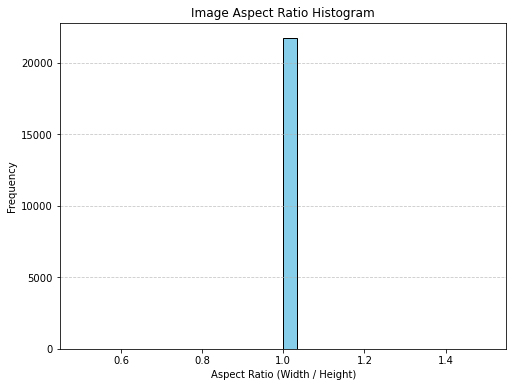

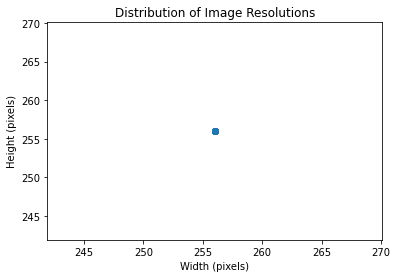

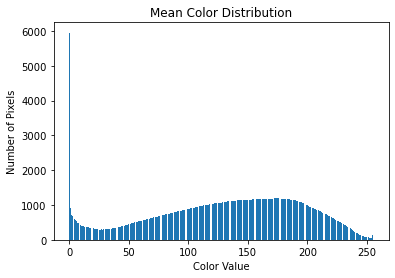

Image Width: 256 pixels
Image Height: 256 pixels


In [8]:
#Image size
data_dir = r"C:\Users\user\Downloads\Lung Segmentation Data\Train"

# Initialize lists to store aspect ratios
aspect_ratios = []

# Iterate over image files to calculate aspect ratios
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png')):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)
            height, width, _ = image.shape
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

# Create a histogram of the aspect ratios
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.title('Image Aspect Ratio Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

# print the actual dimension of the image size
image = cv2.imread(r"C:\Users\user\Downloads\Lung Segmentation Data\Train\COVID-19\sub-S11834_ses-E22547_run-1_bp-chest_vp-ap_dx.png")  

# Get the width and height of the image
height, width, _ = image.shape

print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")



**Key Observations**

- The distribution of image sizes appears to exhibit characteristics consistent with the Gaussian model.

- The average image size measures 29,217.19 bytes, with a minimum size of 7,817 bytes and a maximum size of 52,274 bytes.

- The set with larger size might contain more details or higher-resolution content than the set with smaller size. Investigating the content and context of these images may provide further insights on how to preprocess for our training model.

- An aspect ratio of 1.0 for all the images means that the images have a perfectly square shape, where the width is equal to the height (256 x 256). In other words, the images are not elongated or compressed in any dimension, and they have a 1:1 aspect ratio. 

- There is a broad distribution of pixel values, indicating that a range of colours is present in the image.

## Data Preprocessing and Training-Validation Split

In this phase, we'll undertake vital data preprocessing steps informed by our exploratory data analysis (EDA). We'll prepare our data for deep learning model training and standardize the image dimensions from the original 256 x 256 pixels to a consistent size of 224 x 224 pixels [1, 2]. 

Found 5417 files belonging to 3 classes.
Found 5417 files belonging to 3 classes.
Found 6788 files belonging to 3 classes.
['COVID-19', 'Non-COVID', 'Normal']


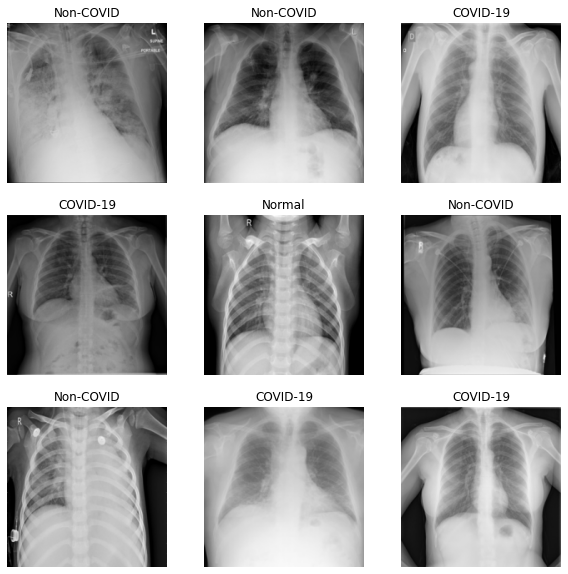

In [29]:
import tensorflow as tf

# Set the directory path to the image dataset
data_dir_train = r"C:\Users\user\Downloads\Lung Segmentation Data\Train"
data_dir_val = r"C:\Users\user\Downloads\Lung Segmentation Data\Val"


# Define batch size and image size
batch_size = 32
image_resize = (224, 224)

# Create training and validation datasets using the `image_dataset_from_directory` function
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_val,
    seed=123,
    image_size=image_resize,
    batch_size=batch_size,
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_val,
    seed=123,
    image_size=image_resize,
    batch_size=batch_size,
)

# Print the class names
class_labels = training_dataset.class_names
print(class_labels)

# Visualize a selection of images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_labels[labels[i]])
        plt.axis('off')
plt.show()

## Method 1: A Customized Four-Layer CNN Model

- ### Preprocessing and Feature Extraction

During this phase of the workflow, we'll employ a Convolutional Neural Network (CNN) model to extract essential features from our image datasets. To ensure optimal model performance, we'll start by rescaling and normalizing our resized image samples. Normalizing the data improves the effectiveness of the CNN.

Our CNN architecture will encompass four convolution layers, utilizing filters with dimensions of 16, 32, 64, and 128 respectively, to extract crucial features from the dataset. Following each convolutional layer, we'll incorporate max-pooling operations to reduce the resolution of the convoluted features. This reduction in resolution assists in minimizing the computational load on the system, enhancing overall efficiency in the process.

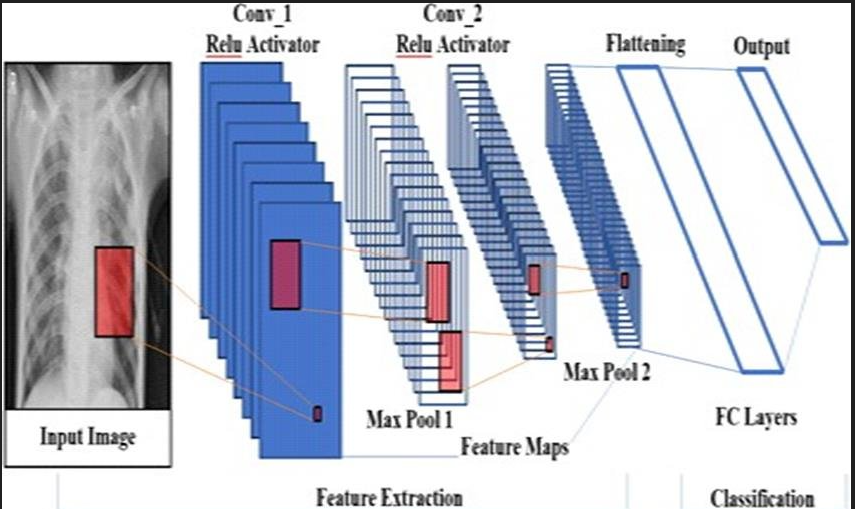
 Figure 1. An example of a CNN structure [3]

- This code initiates the construction of four layers by pre-processing the input data size and performing normalization before engaging in the feature extraction phase using these layers. Subsequently, the model is initialized for training on 10 epochs with the provided training data.

In [39]:
from tensorflow.keras import layers, models

# Create a custom model
custom_model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)), #normalize the input data and resize the image to 224 x 224
    layers.Conv2D(16, kernel_size = (3, 3), activation='relu'), # create the first CNN layer
    layers.MaxPooling2D((2, 2), strides = (2, 2)), #maxpool the first layer using strides (2, 2)
    layers.Conv2D(32, kernel_size = (3, 3), activation='relu'), # create the second layer
    layers.MaxPooling2D((2, 2), strides = (2, 2)), # maxpool the second layer
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'), # create the third layer
    layers.MaxPooling2D((2, 2), strides = (2, 2)), # maxpool the third layer
    layers.Conv2D(128, kernel_size = (3, 3), activation='relu'), # create the fourth layer
    layers.MaxPooling2D((2, 2), strides = (2, 2)), #maxpool the fourth layer
    layers.Flatten(), # flatten the output
    layers.Dense(128, activation='relu'), #Dense the sequential flattened layer
    layers.Dense(len(class_labels))
])

# Compile the custom model
custom_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the custom model using the training dataset
training_history = custom_model.fit(training_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
170/170 [==============================] - 77s 450ms/step - loss: 0.8212 - accuracy: 0.6385 - val_loss: 0.7312 - val_accuracy: 0.6795
Epoch 2/10
170/170 [==============================] - 75s 439ms/step - loss: 0.5524 - accuracy: 0.7859 - val_loss: 0.4870 - val_accuracy: 0.8006
Epoch 3/10
170/170 [==============================] - 75s 440ms/step - loss: 0.4313 - accuracy: 0.8361 - val_loss: 0.3685 - val_accuracy: 0.8645
Epoch 4/10
170/170 [==============================] - 73s 431ms/step - loss: 0.3638 - accuracy: 0.8614 - val_loss: 0.3210 - val_accuracy: 0.8761
Epoch 5/10
170/170 [==============================] - 72s 425ms/step - loss: 0.3053 - accuracy: 0.8865 - val_loss: 0.2644 - val_accuracy: 0.9011
Epoch 6/10
170/170 [==============================] - 73s 431ms/step - loss: 0.2596 - accuracy: 0.8977 - val_loss: 0.2078 - val_accuracy: 0.9262
Epoch 7/10
170/170 [==============================] - 73s 432ms/step - loss: 0.2150 - accuracy: 0.9151 - val_loss: 0.1755 - val_ac

In [40]:
# Checking model summary
custom_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 64)      

- Plotting the loss function and performance accuracy for training and validation

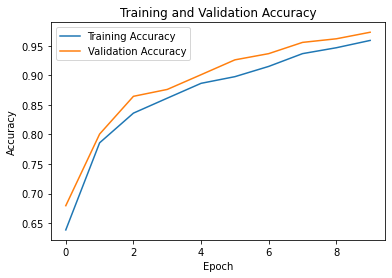

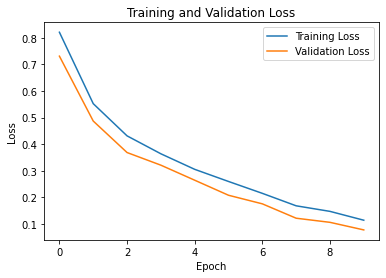

In [41]:

# Plot the training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Key Observations**

Throughout the training process, we consistently witness enhancements in both training and validation metrics. The diminishing training loss signifies the model's effective learning from the training data. Likewise, the increasing training accuracy underscores the model's progressively better performance on the training dataset.

Conversely, the validation loss also follows a decreasing trend across epochs, a positive indication. This reduction implies that the model is not overfitting but is extending its ability to generalize beyond the training data, incorporating the validation dataset. The ascending validation accuracy attests to the model's competence in performing well with previously unseen data.

In summary, the training and validation metrics display consistent progress over epochs, indicating the model's proficiency in learning and generalizing effectively. However, for a conclusive evaluation of model performance, it is essential to assess its performance on an entirely separate test dataset that was not part of the training or validation process. This step will provide a more accurate assessment of the model's capabilities when confronted with entirely new, unseen data. Our next task is to generate a confusion matrix and other classification performance metrics to facilitate a comprehensive assessment.

- This code generates a list of predicted outcomes from the validation dataset and utilizes it to create the confusion matrix for the model.

1/1 [==============================] - 0s 34ms/step
Confusion Matrix:
[[1503  238  162]
 [  79 1502  221]
 [ 119  255 1338]]


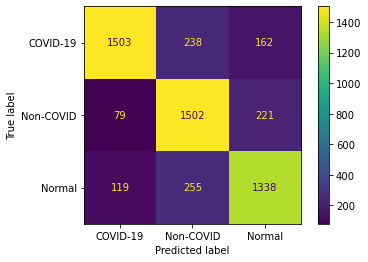

In [117]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Making predictions on the validation dataset using created ML model
val_preds = []
val_labels = []

for images, labels in validation_dataset:
    # Make predictions
    predictions = custom_model.predict(images)
    val_preds.extend(np.argmax(predictions, axis=1))
    val_labels.extend(labels)

# Convert the predictions and labels to NumPy arrays
val_preds = np.array(val_preds)
val_labels = np.array(val_labels)

# Calculate the confusion matrix
confusion = confusion_matrix(val_labels, val_preds)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Display the confusion matrix as a heatmap
ConfusionMatrixDisplay(confusion, display_labels=class_labels).plot()



- This code displays the performance metrics including accuracy, precision, recall, and F1 score.

In [118]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(val_labels, val_preds)

# Calculate precision
precision = precision_score(val_labels, val_preds, average='macro')

# Calculate recall
recall = recall_score(val_labels, val_preds, average='macro')

# Calculate F1-score
f1 = f1_score(val_labels, val_preds, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8017352778290566
Precision: 0.804645019051168
Recall: 0.8016219797375763
F1 Score: 0.8015724384098531


**Key Observations**

The model demonstrates commendable performance, achieving approximately 80% in accuracy, precision, recall, and F1 score. These outcomes imply that the model is adept at making accurate predictions for the majority of instances in the dataset. By fine-tuning the model's hyperparameters, there is a promising opportunity to further enhance its performance beyond the default settings employed during model generation.

### Hyperparameter Tuning of the customized CNN Model

Considering our laptop's limited processing capacity and the resource-intensive nature of optimizing a deep CNN model with four layers, we have decided to start with RandomizedSearchCV with a modest number of iterations, set to two. The goal is to explore a subset of the hyperparameter space efficiently, given our constraints. Following this initial randomized search, we will carefully assess the results produced by the optimization algorithm, which operates with a degree of randomness.

In the event that the randomized search does not yield substantial performance improvements, we are prepared to shift to manual hyperparameter fine-tuning. This adaptive strategy allows us to strike a balance between making efficient use of our computational resources and the pursuit of optimal model configurations.

In [122]:
#Checking the number of samples in the training set
#Initialize a counter
num_samples = 0

# Loop through the training dataset to count the number of samples
for images, _ in training_dataset:
    num_samples += len(images)
    
# Getting the number of classes from the dataset
num_classes = len(training_dataset.class_names)

print("Number of samples in the training dataset:", num_samples)
print("Number of classes:", num_classes)

Number of samples in the training dataset: 5417
Number of classes: 3


In [ ]:
import os
#Optimizing application resource usage before tuning
os.environ["OMP_NUM_THREADS"] = "1"  # Limit the number of threads
os.environ["KMP_INIT_AT_FORK"] = "FALSE"  # Set KMP environment variable

In [104]:
# Labels creation
num_classes = 3

# Create labels with the same number of samples as the training dataset
labels = np.random.randint(num_classes, size=num_samples)

**Hyperparameter Optimization Using RandomizedSearchCV**

In [107]:
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define your custom model as a function
def build_model(learning_rate=0.001, filters=32, kernel_size=(3, 3), hidden_units=128, dropout=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filters * 2, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filters * 4, kernel_size=kernel_size, activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(len(class_labels))
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    return model

# Create a parameter grid for RandomizedSearchCV
param_dist = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'filters': [16, 32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'hidden_units': [64, 128, 256],
    'dropout': [0.3, 0.5, 0.7]
}

# Convert your training dataset to NumPy arrays
training_data = np.concatenate([x for x, y in training_dataset], axis=0)
training_labels = np.concatenate([y for x, y in training_dataset], axis=0)

# Initialize a StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, verbose=0)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=2, cv=kfold, verbose=1, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(training_data, labels)

# Print the best parameters and results
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validated accuracy: {:.2f}%".format(random_search.best_score_ * 100))


C:\Users\user\AppData\Local\Temp\ipykernel_33808\3414221192.py:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, verbose=0)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'learning_rate': 0.01, 'kernel_size': (3, 3), 'hidden_units': 64, 'filters': 16, 'dropout': 0.5}
Best cross-validated accuracy: 33.80%


In [108]:
#printing out the best parameters from the optimizer
random_search.best_params_

{'learning_rate': 0.01,
 'kernel_size': (3, 3),
 'hidden_units': 64,
 'filters': 16,
 'dropout': 0.5}

**Key Observation**

The optimization algorithm yielded a disappointingly low accuracy despite selecting the best parameters it generated. To enhance the model's accuracy and overall performance, we intend to retain all the best parameters except for the learning rate, which we will fine-tune manually.

- This code retrains our model using the optimized hyperparameters to enhance its performance.

In [113]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a custom model with the best hyperparameters
def build_custom_model(learning_rate, kernel_size, hidden_units, filters, dropout):
    model = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
        layers.Conv2D(filters, kernel_size=kernel_size, activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Conv2D(2*filters, kernel_size=kernel_size, activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Conv2D(4*filters, kernel_size=kernel_size, activation='relu'),
        layers.MaxPooling2D((2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(hidden_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(len(class_labels))
    ])

    # Compile the custom model with the best learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

# Use the best hyperparameters
learning_rate = 0.001
kernel_size = (3, 3)
hidden_units = 64
filters = 16
dropout = 0.5

# Create the custom model with the best hyperparameters
custom_model_hyp = build_custom_model(learning_rate, kernel_size, hidden_units, filters, dropout)

# Train the custom model using the training dataset
training_history_hyp = custom_model_hyp.fit(training_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
170/170 [==============================] - 61s 353ms/step - loss: 0.9362 - accuracy: 0.5594 - val_loss: 0.6993 - val_accuracy: 0.7334
Epoch 2/10
170/170 [==============================] - 60s 352ms/step - loss: 0.7438 - accuracy: 0.6963 - val_loss: 0.6242 - val_accuracy: 0.7787
Epoch 3/10
170/170 [==============================] - 62s 366ms/step - loss: 0.6267 - accuracy: 0.7500 - val_loss: 0.4819 - val_accuracy: 0.8196
Epoch 4/10
170/170 [==============================] - 61s 358ms/step - loss: 0.5621 - accuracy: 0.7776 - val_loss: 0.4100 - val_accuracy: 0.8471
Epoch 5/10
170/170 [==============================] - 60s 351ms/step - loss: 0.5061 - accuracy: 0.8071 - val_loss: 0.3491 - val_accuracy: 0.8717
Epoch 6/10
170/170 [==============================] - 60s 355ms/step - loss: 0.4473 - accuracy: 0.8231 - val_loss: 0.4174 - val_accuracy: 0.8375
Epoch 7/10
170/170 [==============================] - 59s 348ms/step - loss: 0.4054 - accuracy: 0.8420 - val_loss: 0.2496 - val_ac

**Key Observation**

By adjusting the learning rate parameter from 0.01 to 0.001, while retaining the other best parameters identified by the optimization algorithm, we observed a remarkable enhancement in the model's performance on previously unseen data. The accuracy surged from 80% to an impressive 94.39%. To ensure a comprehensive evaluation, we will verify the values for other performance metrics, particularly precision and recall scores.

### Performance Evaluation

1/1 [==============================] - 0s 84ms/step
Confusion Matrix:
[[1853   28   22]
 [  26 1608  168]
 [  16   44 1652]]


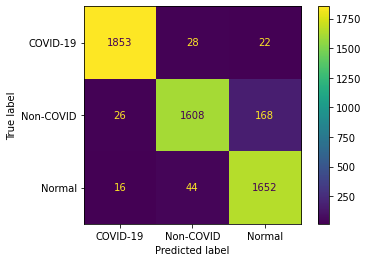

In [114]:
# Now, let's make predictions on the validation dataset
val_preds_hyp = []
val_labels_hyp = []

for images, labels in validation_dataset:
    # Make predictions
    predictions = custom_model_hyp.predict(images)
    val_preds_hyp.extend(np.argmax(predictions, axis=1))
    val_labels_hyp.extend(labels)

# Convert the predictions and labels to NumPy arrays
val_preds_hyp = np.array(val_preds_hyp)
val_labels_hyp = np.array(val_labels_hyp)

# Calculate the confusion matrix
confusion = confusion_matrix(val_labels_hyp, val_preds_hyp)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Display the confusion matrix as a heatmap
ConfusionMatrixDisplay(confusion, display_labels=class_labels).plot()

In [115]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(val_labels_hyp, val_preds_hyp)

# Calculate precision
precision = precision_score(val_labels_hyp, val_preds_hyp, average='macro')

# Calculate recall
recall = recall_score(val_labels_hyp, val_preds_hyp, average='macro')

# Calculate F1-score
f1 = f1_score(val_labels_hyp, val_preds_hyp, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9438803765922097
Precision: 0.9439435057983784
Recall: 0.9436736032314742
F1 Score: 0.9430135239174929


**Key Observations**

- Overall, our model is able to make about 94.39% correct predictions of given input data

- When the model predicts a positive outcome, it is correct about 94.39% of the time

- The model is able to correctly identify about 94.39% of all the actual positive instances in the dataset

## Method 2: A Two-layer CNN Model

We're investigating an alternative CNN variant to train our dataset and evaluate its performance compared to the customized four-layer CNN model, aiming to select the best model for deployment.

-  Creating our CNN layers from scratch by first preprocessing the input data to 32 x 32 and transforming the data to a format compatible with PyTorch's tensor-based computations.

In [145]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

# Define transform to normalize the images
transform = transforms.Compose([
    transforms.Resize((32, 32)), # resize the image to 32 x 32 pixel
    transforms.ToTensor(), #Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #normalize each channel's pixel values using a mean of (0.5, 0.5, 0.5) and a standard deviation of (0.5, 0.5, 0.5).
])

# Load the dataset and split into train and test sets
trainset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

valset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Val", transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 131)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the CNN
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the CNN
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished training")

[Epoch 1, Batch 200] Loss: 0.9231083554029464
[Epoch 1, Batch 400] Loss: 0.6979273818433285
[Epoch 1, Batch 600] Loss: 0.6526896420121193
[Epoch 2, Batch 200] Loss: 0.5351247696578503
[Epoch 2, Batch 400] Loss: 0.5262876881659031
[Epoch 2, Batch 600] Loss: 0.5110806492716073
[Epoch 3, Batch 200] Loss: 0.45171410851180555
[Epoch 3, Batch 400] Loss: 0.4437120232731104
[Epoch 3, Batch 600] Loss: 0.4263846183568239
[Epoch 4, Batch 200] Loss: 0.4102659872919321
[Epoch 4, Batch 400] Loss: 0.39104080487042664
[Epoch 4, Batch 600] Loss: 0.36947968423366545
[Epoch 5, Batch 200] Loss: 0.3341205009445548
[Epoch 5, Batch 400] Loss: 0.3310767432302237
[Epoch 5, Batch 600] Loss: 0.3339919150620699
[Epoch 6, Batch 200] Loss: 0.30433080304414034
[Epoch 6, Batch 400] Loss: 0.28376165315508844
[Epoch 6, Batch 600] Loss: 0.29194913160055874
[Epoch 7, Batch 200] Loss: 0.2328750983439386
[Epoch 7, Batch 400] Loss: 0.2581260634213686
[Epoch 7, Batch 600] Loss: 0.2749642494134605
[Epoch 8, Batch 200] Loss: 0

### Evaluating Model Performance

- Assessing the trend of the loss function over the training epochs.

[Epoch 1, Batch 200] Loss: 0.9444895312190056
[Epoch 1, Batch 400] Loss: 0.6923377749323845
[Epoch 1, Batch 600] Loss: 0.6337310239672661
[Epoch 2, Batch 200] Loss: 0.5511256869882345
[Epoch 2, Batch 400] Loss: 0.514233335107565
[Epoch 2, Batch 600] Loss: 0.49948164127767086
[Epoch 3, Batch 200] Loss: 0.4443780320137739
[Epoch 3, Batch 400] Loss: 0.4251069311797619
[Epoch 3, Batch 600] Loss: 0.42197329334914685
[Epoch 4, Batch 200] Loss: 0.37588060811161994
[Epoch 4, Batch 400] Loss: 0.3629663874208927
[Epoch 4, Batch 600] Loss: 0.3957694322615862
[Epoch 5, Batch 200] Loss: 0.3193204552307725
[Epoch 5, Batch 400] Loss: 0.340633527636528
[Epoch 5, Batch 600] Loss: 0.3356193829700351
[Epoch 6, Batch 200] Loss: 0.28129582677036524
[Epoch 6, Batch 400] Loss: 0.30012038819491865
[Epoch 6, Batch 600] Loss: 0.2963699964061379
[Epoch 7, Batch 200] Loss: 0.2548344059661031
[Epoch 7, Batch 400] Loss: 0.25888885429129005
[Epoch 7, Batch 600] Loss: 0.24608970673754813
[Epoch 8, Batch 200] Loss: 0.

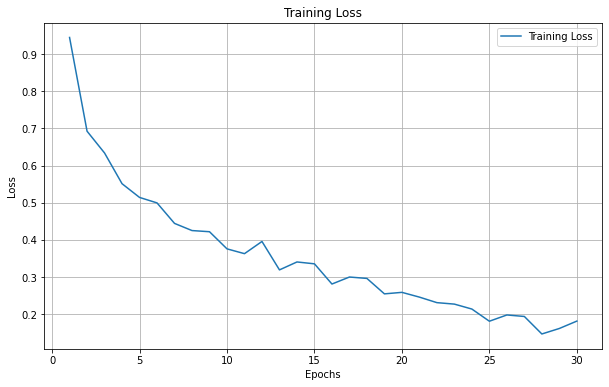

In [146]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define transform to normalize the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the dataset and split into train and test sets
trainset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

valset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Val", transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 131)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the CNN
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Lists to store loss values
train_losses = []

# Train the CNN
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            train_losses.append(running_loss / 200)
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished training")

# Automatically retrieve training loss values
num_epochs = len(train_losses)
epoch_labels = list(range(1, num_epochs + 1))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_labels, train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()


**Key Observation**

Overall, the decreasing trend of the loss values is a positive sign, demonstrating that the model is learning and improving its performance during training. However, it's essential to consider other evaluation metrics such as accuracy, precision, recall, and F1 score to gain a comprehensive understanding of the model's performance.

- **Confusion Matrix, Accuracy, Precision, Recall, and F1 Scores**

Accuracy: 86.57928742846595%
Precision: 0.8682202694443836
Recall: 0.8645275960750588
F1 Score: 0.8633571650079396


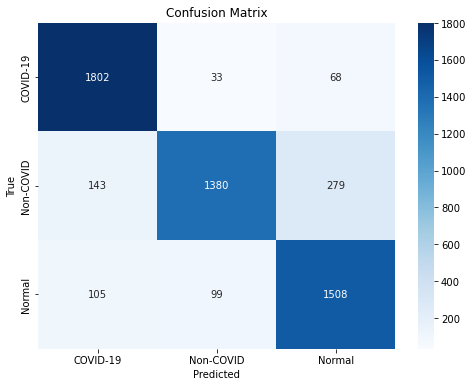

In [147]:
# Evaluate the CNN on the validation set
net.eval()
total = 0
correct = 0
val_preds = []
val_labels = []

with torch.no_grad():
    for images, labels in valloader:
        # Make predictions
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        val_preds.extend(predicted.tolist())
        val_labels.extend(labels.tolist())
        # Compute accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")

# Calculate precision, recall, and F1 score
precision = precision_score(val_labels, val_preds, average='macro')
recall = recall_score(val_labels, val_preds, average='macro')
f1 = f1_score(val_labels, val_preds, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Key Observations**

The model appears to perform well on the validation dataset. It demonstrates a good balance between precision and recall, with an accuracy of 86.87%. These results suggest that the model is capable of effectively classifying the validation data, but further testing on an unseen dataset is advisable to validate its generalization ability.

**Testing with an unseen image sample**

We selected an image sample from the non-COVID subdirectory within the test directory to assess the model's performance. The class labels are given below:
          
   - COVID-19 ........ 0
   - Non-COVID ....... 1
   - Normal .......... 2

In [151]:
from PIL import Image
import numpy as np
from torchvision import transforms
import torch
# load the image
img = Image.open(r"C:\Users\user\Downloads\Lung Segmentation Data\Test\Non-COVID\images\non_COVID (4849).png")

# Adjust the normalization values for single-channel images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Apply the transformation to the image
img_tensor = transform(img)

# Add a batch dimension
img_tensor = img_tensor.unsqueeze(0)

# Moving the image tensor to the same device as the model 
img_tensor = img_tensor.to('cpu')  

# Make predictions using the model
net.eval()
with torch.no_grad():
    prediction = net(img_tensor)
    predicted_class = prediction.argmax().item()
    print("Predicted class label:", predicted_class)


Predicted class label: 1


#### Hyperparameter Tuning of the Two-layer Model

Due to the unexpected performance of the RandomizedSearchCV algorithm in method 1, we opted for an alternative optimization approach using Optuna in method 2. Presented below is the hyperparameter tuning code designed to identify the optimal model parameters.

In [158]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
import optuna
from optuna.trial import Trial
from tqdm import tqdm

# Define the transform to normalize the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the dataset and split into train and validation sets
trainset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

valset = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Val", transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)

# Define the CNN architecture for transfer learning
class Net(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(Net, self).__init__()
        self.model = torchvision.models.resnet18(pretrained=True)
        self.model.fc = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

def objective(trial: Trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    num_epochs = trial.suggest_int("num_epochs", 5, 20)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)

    # Create a new instance of the model for each trial
    net = Net(num_classes=131, dropout_rate=dropout_rate)
    optimizer = optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(num_epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        trial.report(running_loss / len(trainloader), epoch)

        # Handle pruning based on the intermediate value
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # Validation loop
    net.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for images, labels in valloader:
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            val_preds.extend(predicted.tolist())
            val_labels.extend(labels.tolist())

    accuracy = accuracy_score(val_labels, val_preds)
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    
    print("Best trial:")
    trial = study.best_trial
    print("Value (Validation Accuracy): ", trial.value)
    print("Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")


[I 2023-11-07 18:14:29,107] A new study created in memory with name: no-name-8c2dd616-9069-4b59-bf7e-e3f40c8b6bb9
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
C:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\anaconda3

[I 2023-11-07 19:23:25,844] Trial 5 pruned. 
[I 2023-11-07 19:24:19,790] Trial 6 pruned. 
[I 2023-11-07 19:25:13,998] Trial 7 pruned. 
[I 2023-11-07 19:26:07,962] Trial 8 pruned. 
[I 2023-11-07 19:27:02,488] Trial 9 pruned. 
[I 2023-11-07 19:51:21,512] Trial 10 finished with value: 0.3513014583717925 and parameters: {'lr': 0.09232826057554767, 'batch_size': 16, 'num_epochs': 20, 'dropout_rate': 0.4699006404473351}. Best is trial 4 with value: 0.8824072364777552.
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/relea

[I 2023-11-07 21:16:01,213] Trial 32 pruned. 
[I 2023-11-07 21:16:54,797] Trial 33 pruned. 
[I 2023-11-07 21:17:48,065] Trial 34 pruned. 
[I 2023-11-07 21:18:41,518] Trial 35 pruned. 
[I 2023-11-07 21:19:34,916] Trial 36 pruned. 
[I 2023-11-07 21:20:28,325] Trial 37 pruned. 
[I 2023-11-07 21:21:21,915] Trial 38 pruned. 
[I 2023-11-07 21:22:15,505] Trial 39 pruned. 
[I 2023-11-07 21:23:09,338] Trial 40 pruned. 
[I 2023-11-07 21:24:02,827] Trial 41 pruned. 
[I 2023-11-07 21:41:58,769] Trial 42 finished with value: 0.8525013845301828 and parameters: {'lr': 1.1135729736227453e-05, 'batch_size': 64, 'num_epochs': 20, 'dropout_rate': 0.3880276042420225}. Best is trial 4 with value: 0.8824072364777552.
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_lo

[I 2023-11-07 23:21:50,473] Trial 65 finished with value: 0.8464094517260476 and parameters: {'lr': 1.0410827706707963e-05, 'batch_size': 64, 'num_epochs': 19, 'dropout_rate': 0.3530441527729445}. Best is trial 4 with value: 0.8824072364777552.
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
C:\Users\user\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained

[I 2023-11-08 00:44:42,179] Trial 89 pruned. 
[I 2023-11-08 00:45:35,486] Trial 90 pruned. 
[I 2023-11-08 01:01:35,759] Trial 91 finished with value: 0.8429019752630608 and parameters: {'lr': 1.0039272042970123e-05, 'batch_size': 64, 'num_epochs': 18, 'dropout_rate': 0.39894410437723643}. Best is trial 4 with value: 0.8824072364777552.
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:42: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
C:\Users\user\AppData\Local\Temp\ipykernel_33808\2997315420.py:45: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform("dropout_rate", 0.0, 0.5)
C:\Users\user\anacond

Best trial:
Value (Validation Accuracy):  0.8824072364777552
Params: 
    lr: 0.0001825063169172767
    batch_size: 64
    num_epochs: 14
    dropout_rate: 0.4475810732148265


**Training the model with the Best Parameters**

In [165]:

# Define transform to normalize the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the dataset and split into train and test sets
trainset_1 = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Train", transform=transform)
trainloader_1 = torch.utils.data.DataLoader(trainset_1, batch_size=64, shuffle=True, num_workers=2)

valset_1 = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Val", transform=transform)
valloader_1 = torch.utils.data.DataLoader(valset_1, batch_size=64, shuffle=False, num_workers=2)

# Define the CNN architecture with best hyperparameters
class Net(nn.Module):
    def __init__(self, dropout_rate=0.4475810732148265):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 131)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the CNN with the best learning rate
net_1 = Net()
lr = 0.0001825063169172767

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_1.parameters(), lr=lr)

# Train the CNN with the best number of epochs
num_epochs_1 = 14
for epoch in range(num_epochs_1):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished training")


[Epoch 1, Batch 200] Loss: 1.201569347679615
[Epoch 2, Batch 200] Loss: 0.7426271519064903
[Epoch 3, Batch 200] Loss: 0.6834117397665977
[Epoch 4, Batch 200] Loss: 0.6302594624459743
[Epoch 5, Batch 200] Loss: 0.5960199983417988
[Epoch 6, Batch 200] Loss: 0.5631183366477489
[Epoch 7, Batch 200] Loss: 0.529160141646862
[Epoch 8, Batch 200] Loss: 0.5112609988451005
[Epoch 9, Batch 200] Loss: 0.49917194023728373
[Epoch 10, Batch 200] Loss: 0.48116909712553024
[Epoch 11, Batch 200] Loss: 0.45946132615208624
[Epoch 12, Batch 200] Loss: 0.4465541833639145
[Epoch 13, Batch 200] Loss: 0.426693454310298
[Epoch 14, Batch 200] Loss: 0.41278598718345166
Finished training


**Plotting the loss function for the optimized model**

[Epoch 1, Batch 200] Loss: 1.1691985827684404
[Epoch 2, Batch 200] Loss: 0.7242835345864296
[Epoch 3, Batch 200] Loss: 0.6605560958385468
[Epoch 4, Batch 200] Loss: 0.6256727382540703
[Epoch 5, Batch 200] Loss: 0.5900125333666801
[Epoch 6, Batch 200] Loss: 0.5602148206532002
[Epoch 7, Batch 200] Loss: 0.538350330889225
[Epoch 8, Batch 200] Loss: 0.5168532936275005
[Epoch 9, Batch 200] Loss: 0.4901794618368149
[Epoch 10, Batch 200] Loss: 0.47297837033867834
[Epoch 11, Batch 200] Loss: 0.47222701981663706
[Epoch 12, Batch 200] Loss: 0.44333036422729494
[Epoch 13, Batch 200] Loss: 0.4223335692286491
[Epoch 14, Batch 200] Loss: 0.4149561544507742
Finished training


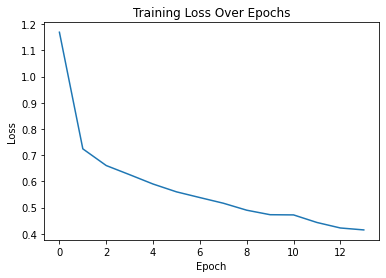

In [166]:
# Define transform to normalize the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the dataset and split into train and test sets
trainset_1 = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Train", transform=transform)
trainloader_1 = torch.utils.data.DataLoader(trainset_1, batch_size=64, shuffle=True, num_workers=2)

valset_1 = torchvision.datasets.ImageFolder(root=r"C:\Users\user\Downloads\Lung Segmentation Data\Val", transform=transform)
valloader_1 = torch.utils.data.DataLoader(valset_1, batch_size=64, shuffle=False, num_workers=2)

# Define the CNN architecture with best hyperparameters
class Net(nn.Module):
    def __init__(self, dropout_rate=0.4475810732148265):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 131)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the CNN with the best learning rate
net_1 = Net()
lr = 0.0001825063169172767

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_1.parameters(), lr=lr)

# Initialize an empty list to store the training loss
train_losses_1 = []

# Train the CNN with the best number of epochs
num_epochs_1 = 14
for epoch in range(num_epochs_1):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            train_losses_1.append(running_loss / 200)  # Append the average batch loss
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200}")
            running_loss = 0.0

print("Finished training")

# Plot the training loss
plt.plot(train_losses_1)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Key**

The loss steadily decreases over the epochs and batches, indicating that the model is learning and improving its predictions as training progresses. To finalize the process for method 2, it is essential to assess the optimized model's performance using unseen data.

#### Evaluating the Optimized Model Performance

Accuracy: 83.5887022337087%
Precision: 0.8423582810437197
Recall: 0.8365598659748422
F1 Score: 0.8349105674199354


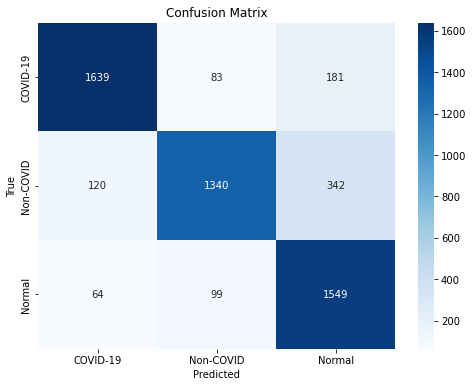

In [167]:
# Evaluate the CNN on the validation set
net_1.eval()
total = 0
correct = 0
val_preds_1 = []
val_labels_1 = []

with torch.no_grad():
    for images, labels in valloader_1:
        # Make predictions
        outputs = net_1(images)
        _, predicted = torch.max(outputs.data, 1)
        val_preds_1.extend(predicted.tolist())
        val_labels_1.extend(labels.tolist())
        # Compute accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")

# Calculate precision, recall, and F1 score
precision = precision_score(val_labels_1, val_preds_1, average='macro')
recall = recall_score(val_labels_1, val_preds_1, average='macro')
f1 = f1_score(val_labels_1, val_preds_1, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels_1, val_preds_1)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Key Observation**

The optimized model yields an 84% accuracy, precision, recall, and F1 score, which is notably lower than the initial model's performance at 86%. This suggests that the initial model is expected to outperform the optimized model in making predictions.

### Model Selection for Deployment

Considering the results of the two chosen methods for model generation, we have decided to favor method 1 due to its higher degree of accuracy compared to method 2. The upcoming phase of the project will involve deployment, during which we will utilize Flask API to develop an interactive interface for real-world image predictions across the three defined image classes.

### Exporting the best model for deployment

This stage of the project begins by saving our selected model in an HDF5 file format. Following this, we will proceed to develop a web application using Flask API in a visual studio code deployment IDE that allows our audience to test unseen data in an interactive environment.

In [ ]:
from tensorflow import keras

#Saving the model in the same directory with the jupyter notebook
custom_model_hyp.save('custom_model.h5')  

### References

    [1]  "S. Khoja, “Exploring and Analyzing Image Data with Python - Sehjad khoja - Medium,” Medium, Jun. 05, 2023. Accessed: Oct. 18, 2023. [Online]. Available: https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImM2MjYzZDA5NzQ1YjUwMzJlNTdmYTZlMWQwNDFiNzdhNTQwNjZkYmQiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDE4NDExMzY4OTIyOTA1MDc3NjQiLCJlbWFpbCI6ImVwcmlkd3VAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsIm5iZiI6MTY5NzA0NTY1MiwibmFtZSI6IlByaW5jZSBEd3VtYWgtQm9hZGkiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jSXRpTjk3MkJNelhkSnlUMzlMZGVaYkVVR2trRmgtMFE0T25fc1lyX0I4Q0E9czk2LWMiLCJnaXZlbl9uYW1lIjoiUHJpbmNlIiwiZmFtaWx5X25hbWUiOiJEd3VtYWgtQm9hZGkiLCJsb2NhbGUiOiJlbiIsImlhdCI6MTY5NzA0NTk1MiwiZXhwIjoxNjk3MDQ5NTUyLCJqdGkiOiI4NjgzZmEyYjc1ZWJmOTU3Y2JiYTZmM2RkNGM0MjMxNWE2NGI1YmZlIn0.HR5GfJNo0Q9qMpFsi1YoGms8H9X9FA0fgCagXD9HE"
    
    [2] OpenAI, “Histogram plotting using matplotlib library,” AI - Default (GPT-3.5). https://chat.openai.com. (accessed Nov. 06, 2023).
    
    [3]  “Figure 1 illustrates the CNN structure and process. It has mainly 3...,” ResearchGate. https://www.researchgate.net/figure/llustrates-the-CNN-structure-and-process-It-has-mainly-3-layer-they-are-convolution_fig1_341541621 (accessed Nov. 06, 2023).